### Ejercicio 3 - sección 2.4.5

In [1]:
import sympy as smp
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

Considere el espacio vectorial, $C∞_{[−1,1]}$, de funciones reales, continuas y continuamente diferenciables
definidas en el intervalo [−1, 1]. Es claro que una posible base de este espacio de funciones la constituye el
conjunto de monomios {
1, x, x2
, x3
, x4
, · · · 	}
por cuanto estas funciones son linealmente independientes

In [2]:
#Definimos x como variable simbólica
x = smp.symbols('x')

#Definimos las bases
bases = [1, x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9]
base_ort = []
n_base = len(bases)

_a)_ Si suponemos que este espacio vectorial está equipado con un producto interno definido por $<f | g>  = \int_{-1}^{1} \!  f(x)g(x) \, dx$
, muestre que esa base de funciones no es ortogonal.

In [3]:
#Definimos el producto interno
def inner_prod(f, g):
    p = smp.integrate(f*g, (x, -1, 1))
    return p


Mostremos que el producto interno de dos de las bases no es ortogonal: 

In [4]:
print("El producto interno de", x, " y ", x**3, " es: ", inner_prod(x, x**3))
#Evaluamos el producto interno en cada par de bases
# for i in range(n_base):
#     for j in range(n_base):
#         # print("El producto interno entre {} y {} es: ".format(bases[i],bases[j]), inner_prod(bases[i], bases[j]))


El producto interno de x  y  x**3  es:  2/5


_b)_ Utilizando la misma definición de producto interno, ortogonalice la base y encuentre los 10 primeros vectores base. Estos serán los polinomios de Legendre.

In [5]:
#Ortogonalizamos las bases y obtenemos los polinomios de Legendre
def ort(bases):
    base_ort = []
    for i in range(n_base):
        base_ort.append(bases[i])
        for j in range(i):
            base_ort[i] = base_ort[i] - (inner_prod(base_ort[i], base_ort[j]) / inner_prod(base_ort[j], base_ort[j])) * base_ort[j]
        #Normalizamos
        base_ort[i] = base_ort[i] / smp.sqrt(inner_prod(base_ort[i], base_ort[i]))
    return base_ort
base_ort = ort(bases)
#Imprimimos los polinomios de Legendre
for i in range(n_base):
    print("El polinomio de grado ", i, " es: ", base_ort[i])

El polinomio de grado  0  es:  sqrt(2)/2
El polinomio de grado  1  es:  sqrt(6)*x/2
El polinomio de grado  2  es:  3*sqrt(10)*(x**2 - 1/3)/4
El polinomio de grado  3  es:  5*sqrt(14)*(x**3 - 3*x/5)/4
El polinomio de grado  4  es:  105*sqrt(2)*(x**4 - 6*x**2/7 + 3/35)/16
El polinomio de grado  5  es:  63*sqrt(22)*(x**5 - 10*x**3/9 + 5*x/21)/16
El polinomio de grado  6  es:  231*sqrt(26)*(x**6 - 15*x**4/11 + 5*x**2/11 - 5/231)/32
El polinomio de grado  7  es:  429*sqrt(30)*(x**7 - 21*x**5/13 + 105*x**3/143 - 35*x/429)/32
El polinomio de grado  8  es:  6435*sqrt(34)*(x**8 - 28*x**6/15 + 14*x**4/13 - 28*x**2/143 + 7/1287)/256
El polinomio de grado  9  es:  12155*sqrt(38)*(x**9 - 36*x**7/17 + 126*x**5/85 - 84*x**3/221 + 63*x/2431)/256


Repita el procedimiento anterior con el producto interno: 
$<f | g>  = \int_{-1}^{1} \!  f(x)g(x) \sqrt{(1-x^2)} \, dx$, de forma que obtenga una base de polinomios de Chebyshev.

In [6]:
#Definimos el producto interno de chebyshev
def inner_prod_cheb(f, g):
    p = smp.integrate(f*g*smp.sqrt(1-x**2), (x, -1, 1))
    return p

xx = inner_prod_cheb(x**2, 1)
xx

pi/8

In [7]:
# #Polinomios de chebyshev
# def base_ort_cheb(bases):
#     base_ort = []
#     for i in range(n_base):
#         base_ort.append(bases[i])
#         for j in range(i):
#             base_ort[i] = base_ort[i] - (inner_prod_cheb(base_ort[i], base_ort[j]) / inner_prod_cheb(base_ort[j], base_ort[j])) * base_ort[j]
#     return base_ort
# base_ort_cheb = base_ort_cheb(bases)
# for i in range(n_base):
#     print("El polinomio de grado ", i, " es: ", base_ort_cheb[i])

In [8]:
#Producto interno de chebyshev con metodos numericos y calcular el producto interno de chebyshev de dos bases
def inner_prod_cheb_num(f, g):
    f = smp.lambdify(x, f)
    g = smp.lambdify(x, g)
    p = quad(lambda x: f(x)*g(x)*np.sqrt(1-x**2), -1, 1)
    return p[0] 
def base_ort_cheb_num(bases):
    base_ort = []
    for i in range(n_base):
        base_ort.append(bases[i])
        for j in range(i):
            base_ort[i] = base_ort[i] - (inner_prod_cheb_num(base_ort[i], base_ort[j]) / inner_prod_cheb_num(base_ort[j], base_ort[j])) * base_ort[j]
    #normalizamos
    for i in range(n_base):
        base_ort[i] = base_ort[i] / smp.sqrt(inner_prod_cheb_num(base_ort[i], base_ort[i]))
        
    return base_ort
base_ort_cheb_num = base_ort_cheb_num(bases)
for i in range(n_base):
    print("El polinomio de grado ", i, " es: ", base_ort_cheb_num[i])

El polinomio de grado  0  es:  0.797884560802865
El polinomio de grado  1  es:  1.59576912160592*x
El polinomio de grado  2  es:  3.1915382432184*x**2 - 0.797884560804409
El polinomio de grado  3  es:  6.3830764865199*x**3 - 3.19153824326068*x
El polinomio de grado  4  es:  12.7661529737317*x**4 - 9.57461473033968*x**2 + 0.797884560867904
El polinomio de grado  5  es:  25.5323059520603*x**5 - 25.5323059511829*x**3 + 4.78730736557402*x
El polinomio de grado  6  es:  51.0646119309475*x**6 - 63.8307649074046*x**4 + 19.1492294694822*x**2 - 0.79788456104898
El polinomio de grado  7  es:  102.129224008091*x**7 - 153.193835973376*x**5 + 63.8307649584083*x**3 - 6.38307648929393*x
El polinomio de grado  8  es:  204.25844880114*x**8 - 357.452285183505*x**6 + 191.492295496955*x**4 - 31.9153825576152*x**2 + 0.797884563432268
El polinomio de grado  9  es:  408.516902060617*x**9 - 817.033802945033*x**7 + 536.178432296125*x**5 - 127.661531233951*x**3 + 7.97884567435247*x


Suponga la función $h(x) = \sin(3x)(1-x^2)$:

_I._ Expanda la función $h(x)$ en términos de la base de polinomios de Legendre, grafique, compare y encuentre el grado de los polinomios en los cuales definen las expansiones.

In [9]:
#Definimos la función h(x)
h = smp.sin(3*x)*(1-x**2)

#Expandimos la función en términos de los polinomios de Legendre
def expand_leg(f, base, n, prod):
        if prod == "legendre":
            f_exp = 0
            for i in range(n):
                f_exp = f_exp + inner_prod(f, base[i]) * base[i]
        elif prod == "chebyshev":
            f_exp = 0
            for i in range(n):
                f_exp = f_exp + inner_prod_cheb(f, base[i]) * base[i]
                #Simplificamos  
                f_exp = smp.simplify(f_exp)
        return f_exp
h_exp = expand_leg(h, base_ort, n_base, "legendre")
h_exp_sin_ort = expand_leg(h, bases, n_base, "legendre")


In [10]:
#Calculamos el error
def error_leg(f, f_exp):
    err = smp.sqrt(inner_prod(f - f_exp, f - f_exp))
    err = smp.trigsimp(err)
    return err  
err = error_leg(h, h_exp)
err.evalf()

3.90048428846878e-5

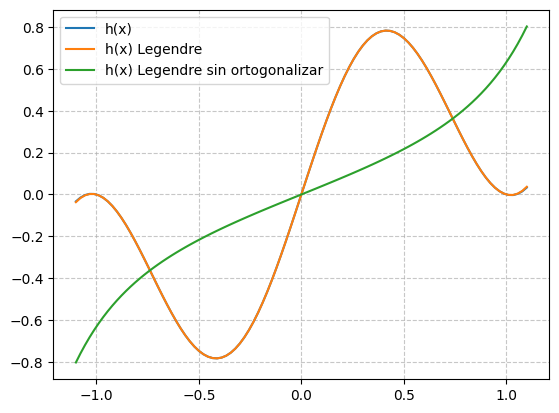

In [11]:
#Graficamos la función h(x), la expansión en términos de los polinomios de Legendre y la expansión sin ortogonalizar
t = np.linspace(-1.1,1.1, 100)
hh = smp.lambdify(x, h)
hh_exp = smp.lambdify(x, h_exp)
hh_exp_sin_ort = smp.lambdify(x, h_exp_sin_ort)
plt.plot(t, hh(t), label = 'h(x)')
plt.plot(t, hh_exp(t), label = 'h(x) Legendre')
plt.plot(t, hh_exp_sin_ort(t), label = 'h(x) Legendre sin ortogonalizar')
plt.legend()
plt.grid(alpha = 0.7, linestyle = '--')
plt.show()

_II._ Expansión en términos de la base de polinomios de Chebyshev:

In [12]:
#Usamos otro método para expandir h en terminos de los polinomios de chebyshev sin consumir tanta memoria
def expand_leg_cheb(f, base, n, prod):
        if prod == "legendre":
            f_exp = 0
            for i in range(n):
                f_exp = f_exp + inner_prod(f, base[i]) * base[i]
        elif prod == "chebyshev":
            f_exp = 0
            for i in range(n):
                f_exp = f_exp + inner_prod_cheb_num(f, base[i]) * base[i]
                #Simplificamos  
                f_exp = smp.simplify(f_exp)
        return f_exp
h_exp_cheb = expand_leg_cheb(h, base_ort_cheb_num, n_base, "chebyshev")
h_exp_cheb_sin_ort = expand_leg_cheb(h, bases, n_base, "chebyshev")


In [13]:
#Definimos la expansión de chevishev de forma analítica
def chebyshev(n):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return 2*x*chebyshev(n-1) - chebyshev(n-2)
chebyshev = [chebyshev(i) for i in range(n_base)]
chebyshev = [smp.simplify(chebyshev[i]) for i in range(n_base)]
chebyshev


[1,
 x,
 2*x**2 - 1,
 x*(4*x**2 - 3),
 8*x**4 - 8*x**2 + 1,
 x*(16*x**4 - 20*x**2 + 5),
 32*x**6 - 48*x**4 + 18*x**2 - 1,
 x*(64*x**6 - 112*x**4 + 56*x**2 - 7),
 128*x**8 - 256*x**6 + 160*x**4 - 32*x**2 + 1,
 x*(256*x**8 - 576*x**6 + 432*x**4 - 120*x**2 + 9)]

In [14]:
#Calculamos el error
def error_cheb(f, f_exp):
    err = smp.sqrt(inner_prod_cheb(f - f_exp, f - f_exp))
    err = smp.trigsimp(err)
    return err

err2 = error_cheb(h, h_exp_cheb)


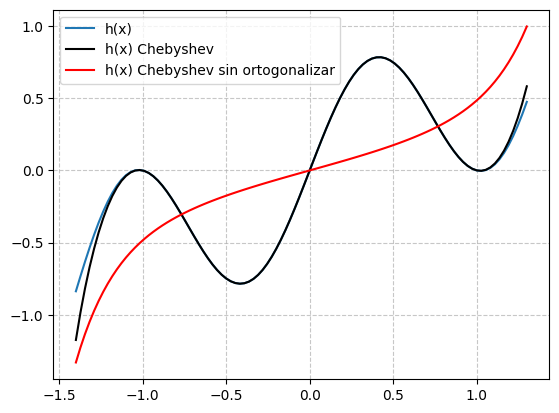

In [ ]:
#Graficamos la función h(x) y la expansión en términos de los polinomios de chebyshev
hh_cheb = smp.lambdify(x, h_exp_cheb)
hh_cheb_sin_ort = smp.lambdify(x, h_exp_cheb_sin_ort)
plt.plot(t, hh(t), label = 'h(x)')
plt.plot(t, hh_cheb(t), label = 'h(x) Chebyshev', color = 'k')
plt.plot(t, hh_cheb_sin_ort(t), label = 'h(x) Chebyshev sin ortogonalizar', color = 'r')
plt.legend()
plt.grid(alpha = 0.7, linestyle = '--')
plt.show()

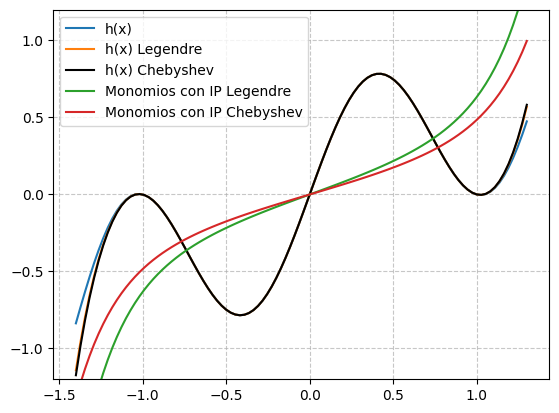

In [ ]:
#Graficamos todos los polinomios junto
t = np.linspace(-1.4,1.3, 100)
#Limites en y
plt.ylim(-1.2, 1.2)

plt.plot(t, hh(t), label = 'h(x)')
plt.plot(t, hh_exp(t), label = 'h(x) Legendre')
plt.plot(t, hh_cheb(t), label = 'h(x) Chebyshev', color = 'k')
plt.plot(t, hh_exp_sin_ort(t), label = 'Monomios con IP Legendre')
plt.plot(t, hh_cheb_sin_ort(t), label = 'Monomios con IP Chebyshev')
plt.legend()
plt.grid(alpha = 0.7, linestyle = '--')
plt.show()
